# Intro
- plt 의 기초적인 구동법, 구성 요소는 elementary 에서 배웠을 것이다.
- 여기에서는 plt.pyplot 의 API 를 이용해서 plt 가지고 어떤 Visualization 이 가능한지 예시들과 함께 알아보도록 하자.

In [1]:
## drive 수정
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from seaborn import load_dataset
diamonds=load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target,columns=["Target"])
df = pd.concat([X, y], axis=1)
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


# bar

## barplot

- 기본적인 타입. categorical 변수에 대해서 그 비율을 조사해준다.

In [9]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
diamonds['cut'].unique() 

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

- plt.bar 를 그리려면 x,y 의 라벨을 써 주어야 한다.
- 그런데 범주형인 경우 label 과 각각의 value_counts 를 x,y 에 써주어야 하므로 unique 와 value_counts 를 같이 써야한다.

<BarContainer object of 5 artists>

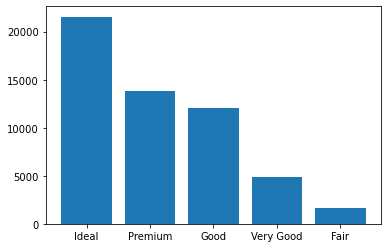

In [11]:
plt.bar(diamonds['cut'].unique(), diamonds['cut'].value_counts())

## Stacked bar

- Stacked bat 는 범주형 범위에 대해서 많은 변수들의 측정치의 합들을 쌓아 올려준다.
- 각 범주에 대해서 그 counts 와 그 위에 price 를 쌓아 올려보자.

In [31]:
counts = diamonds['cut'].value_counts()
price = diamonds['price'].groupby(diamonds['cut']).agg(np.mean)
price = price[diamonds['cut'].unique()] # x 의 order 맞추어주기

- 아래와 같이 bottom 을 지정하게 되면 그 값이 아래에 깔리게 된다.

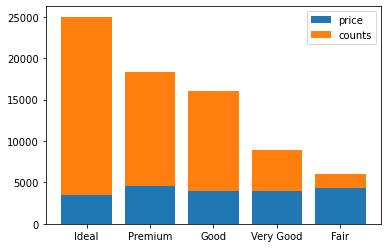

In [32]:
plt.bar(diamonds['cut'].unique(),price,label='price')
plt.bar(diamonds['cut'].unique(), counts, bottom = price,label='counts')
plt.legend() ; 

## horizental bar

- 수평 막대 그래프를 그릴 수 있다.

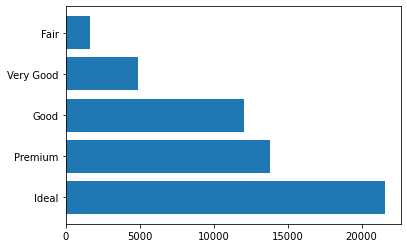

In [39]:
plt.barh(diamonds['cut'].unique(), diamonds['cut'].value_counts()) ; 

- 이 때 두개의 범주에 대해서 위와 같이 비교해볼 수 있다.

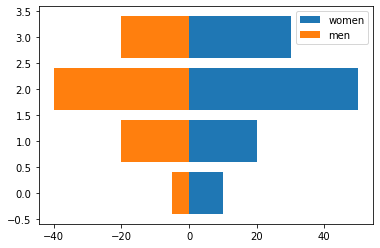

In [46]:
women = np.array([10,20,50,30])
men = np.array([5,20,40,20])
X = np.arange(4)
plt.barh(X, women, label = 'women')
plt.barh(X, -men, label = 'men')
plt.legend() ;

# Scatter

- 제일 기본적인 Scatter plot 이다.
- 그러나 대부분 대용량의 데이터를 다루는 경우 점이 겹쳐서 잘 보이지 않을것이다.

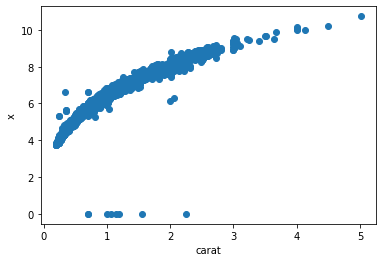

In [165]:
plt.scatter(df['carat'],df['x']) ;
plt.xlabel('carat')
plt.ylabel('x')
plt.show()

- 아래와 같이 alpha 를 지정해주면, 진한 부분이 많은 데이터가 쏠려있는곳이라 예측이 가능하다.

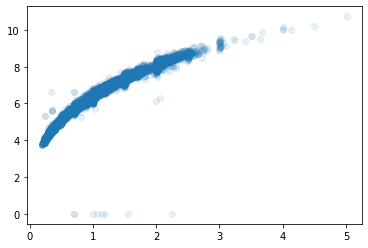

In [172]:
plt.scatter(df['carat'],df['x'],alpha=0.1) ;

# Histogram

- 히스토그램은 대게 conti value 에 대해 분포를 알아보기 위해 사용된다.

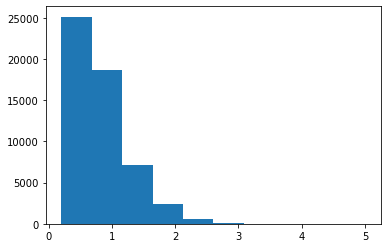

In [173]:
df = diamonds.copy()
plt.hist(df['carat']) ; 

# Pie chart

- dataframe 에서 pie chart 를 단독으로 범주형 변수에 쓸 수 는 없다.
- 이를 쓰기 위해서는 value_counts() 메소드로 우선 몇개인지 알려주는 df 를 생성한 후에 적용해야한다.

In [174]:
color = df['color'].value_counts()

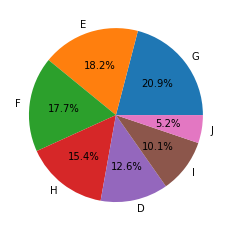

In [175]:
plt.pie(color.values,
        labels=color.index,
        autopct='%1.1f%%' # 몇퍼센트인지 알려준다.
       )
plt.show()

# lineplot

- 그냥 plt.plot 을 쓰게 되면, 각 points 를 잇는 선 그래프를 그리게 된다.
- 주로 시계열의 경우에 쓰게 된다.

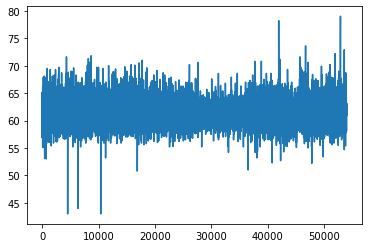

In [176]:
plt.plot(df['depth'])

# contour Plot

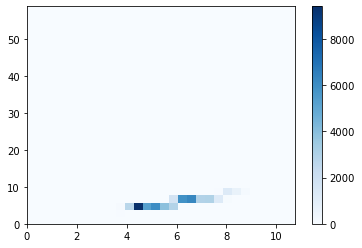

In [177]:
plt.hist2d(df['x'],df['y'],bins=30, cmap='Blues') 
cb = plt.colorbar() # color바 추가

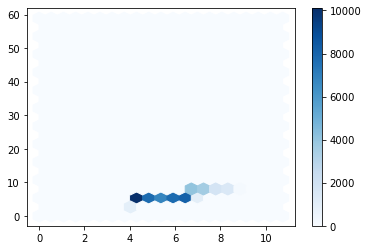

In [178]:
plt.hexbin(df['x'],df['y'],gridsize=20, cmap='Blues') 
cb = plt.colorbar() # color바 추가

# Boxplot + every col

- 모든 numeric nolumns 에 대해 그 분포를 조사하고 싶을 수 있다.
- 이를 통해서 분포가 어떤지와, 분산이 크진 않은지, 혹은 Outlier 가 존재하지 않는지를 조사할 수 있다.

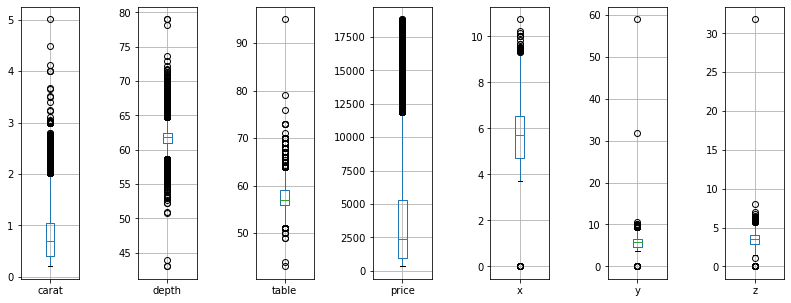

In [245]:
plt.figure(figsize = (20,5))
plt.subplots_adjust(wspace=1)
for num,column in enumerate(df.select_dtypes(include=np.number)):
    plt.subplot(1,10,num+1)
    df.boxplot(column)

# Baxplot + groupby

- 아래와 같은 방법으로 df 에 대해서 gruopby 를 진행한 후, boxplot 그리기 가능
- 사실 원 df 의 분포는 생각보다 크게 중요하지는 않다.

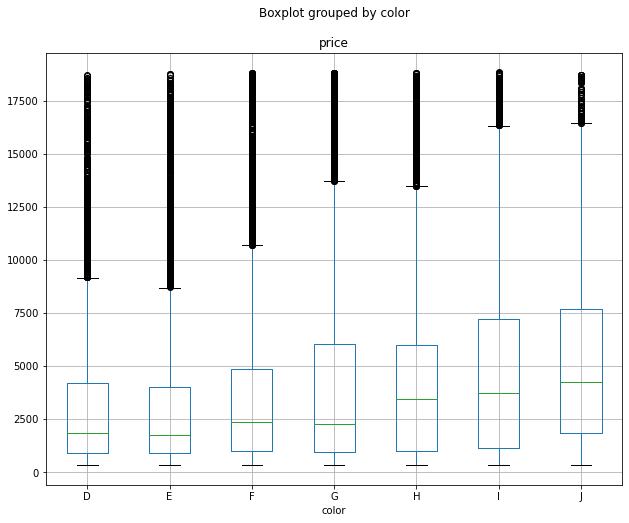

In [149]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['price'], by='color', ax=ax) ;

# Histo + every col

이번에는 numeric 이 아니라 not numeric 한 값에 대해서 그 분포를 조사하고 싶을 수 있다.

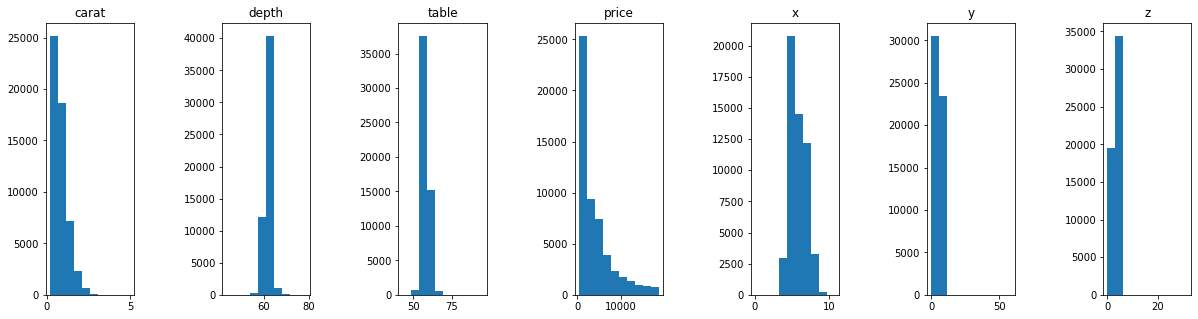

In [265]:
plt.figure(figsize = (30,5))
plt.subplots_adjust(wspace=1)
for num,col in enumerate(df.select_dtypes(include=np.number)):
    plt.subplot(1,10,num+1)
    plt.hist(df[col])
    plt.title(col)

# Histogram + groupby

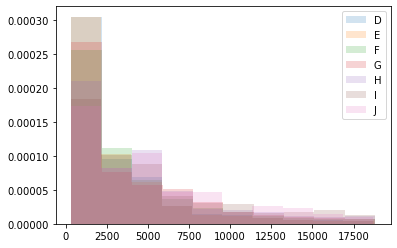

In [218]:
# idx 와 data 를 groupby 로 묶은 객체에 for 문으로 묶은 뒤 for 문을 돌리면 아래와 같이 겹쳐서 히스토그램을 그리게 된다.
for idx, data in df.groupby('color')['price']:
    plt.hist(data, density=True,alpha=0.2,label = idx)
plt.legend()

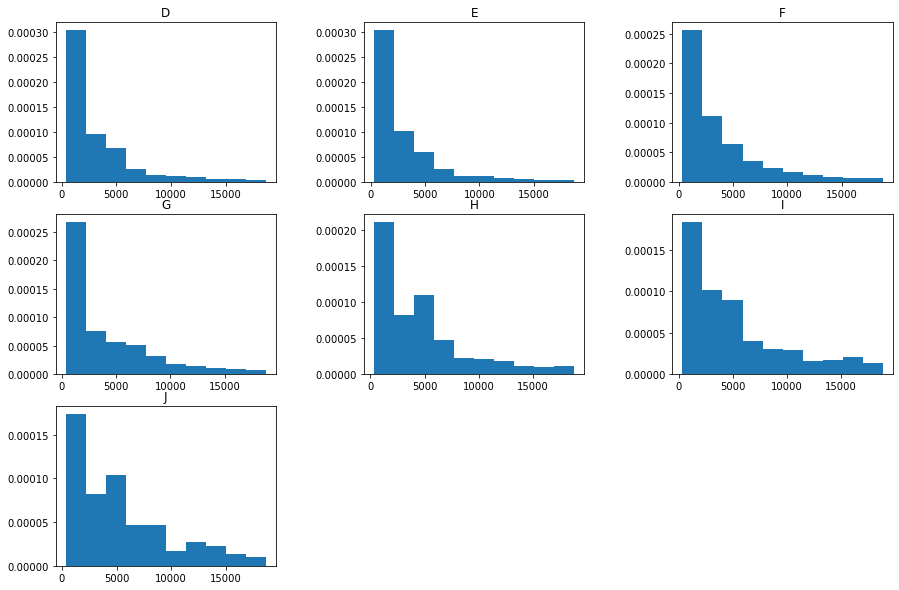

In [295]:
# 위의 경우 너무 겹쳐서 알기 어려울 수 있다.
# 그런 경우 아래와 같이 enumerate 와 함께 쓰면 각기 다른 함수들의 분포를 알아볼 수 있다.
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.4)
for num , (idx, data) in enumerate(df.groupby('color')['price']):
    plt.subplot(3,3,num+1)
    plt.hist(data, density=True)
    plt.title(idx)

# barplot + everycol

- Groupby 는 생략! 더 하려면 Groupby 된 데이터를 새로 df1 으로 정의 후, 아래를 다시 적용하면 된다.

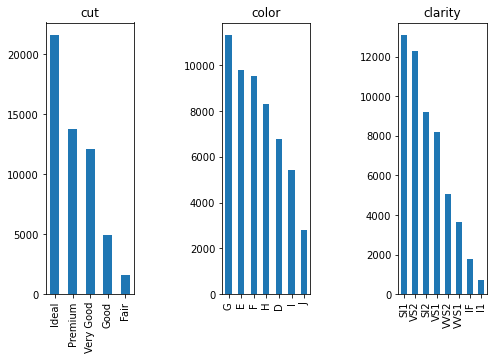

In [291]:
plt.figure(figsize = (30,5))
plt.subplots_adjust(wspace=1)
for num,col in enumerate(df.select_dtypes(exclude=np.number)):
    plt.subplot(1,10,num+1)
    data = df[col].value_counts()
    data.plot.bar()
    plt.title(col)

# Pie + every col

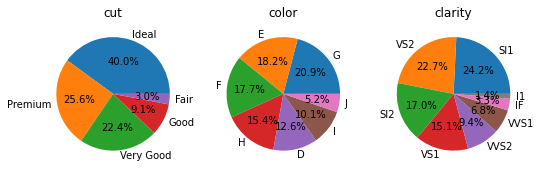

In [296]:
plt.figure(figsize = (30,5))
for num,col in enumerate(df.select_dtypes(exclude=np.number)):
    plt.subplot(1,10,num+1)
    data = df[col].value_counts()
    plt.pie(data.values,
        labels=data.index,
        autopct='%1.1f%%' # 몇퍼센트인지 알려준다.
       )
    plt.title(col)